In this notebook, I will show you how to make insurance price prediction with Linear Regression.

Loading The Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("insurance.csv")

Understanding The Data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
data.sort_values(by = "age").head()

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.82,0,no,southeast,1633.96180
482,18,female,31.35,0,no,southeast,1622.18850
492,18,female,25.08,0,no,northeast,2196.47320
525,18,female,33.88,0,no,southeast,11482.63485
529,18,male,25.46,0,no,northeast,1708.00140


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dealing with Missing Data

In [6]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Preprocessing The Data

In [45]:
#convert them to category type to use the model building later.
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [47]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [48]:
#take a look at summary statistics.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [51]:
data["smoker"] = data["smoker"].astype("int8")

In [53]:
data["smoker"].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int8

In [54]:
smoke_data = data.groupby("smoker").agg({'smoker': 'mean'}).round(2)

In [55]:
smoke_data

,smoker
smoker,
0,0.0
1,1.0


Preprocessing The Data

In [26]:
import seaborn as sns

In [56]:
sns.set_style("whitegrid")

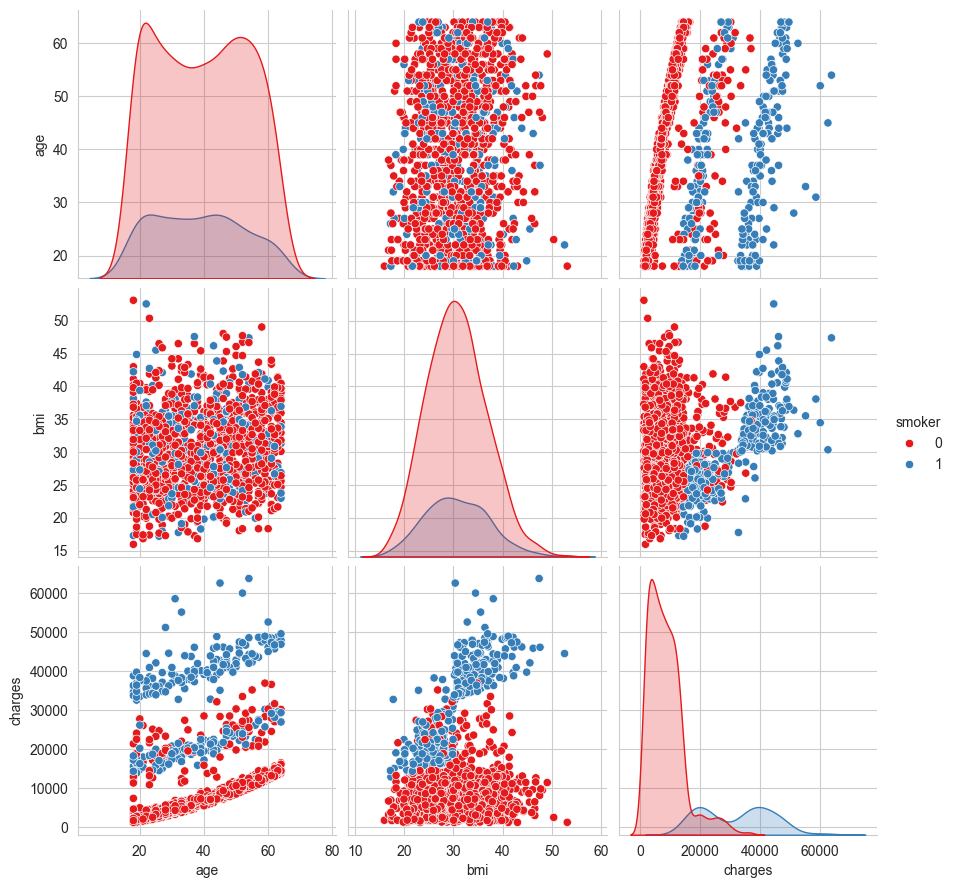

In [57]:
sns.pairplot(data[["age", "bmi", "charges", "smoker"]],
            hue = "smoker",
            height = 3,
            palette="Set1")

In [61]:
# remove non-numeric columns before creating correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

<Axes: >

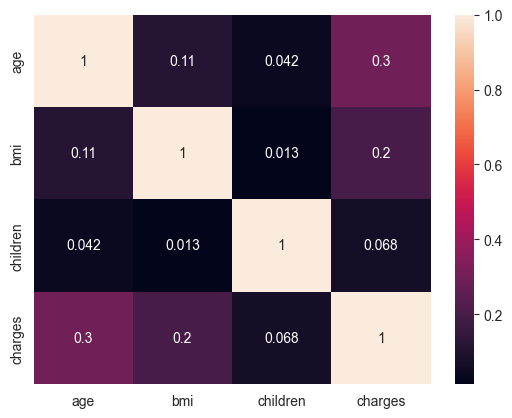

In [60]:
sns.heatmap(correlation_matrix, annot=True)

One-Hot Encoding

In [62]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [65]:
#Some categorical variables have subcategories such as sex and smoker. 
#We need to convert these categorical variables into a form that the scikit-learn library can understand.
data = pd.get_dummies(data)

In [64]:
data.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

Creating Input and Output Variables

In [66]:
y = data["charges"]

In [67]:
X = data.drop("charges", axis = 1)

Splitting The Dataset

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)

Building The Model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

Evaluating The Model

In [73]:
lr.score(X_test, y_test).round(3)

0.762

In [74]:
lr.score(X_train, y_train).round(3)

0.748

let's take a look at another metric, mean squared error, to evaluate the model.

In [75]:
y_pred = lr.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
import math

In [78]:
math.sqrt(mean_squared_error(y_test, y_pred))

5956.454717976427

Predicting a New Data

In [79]:
#I'm going to predict the first row as an example.
data_new = X_train[:1]

In [80]:
data_new

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,0,True,False,False,True,False,False


In [81]:
lr.predict(data_new)

array([10508.41885042])

In [82]:
#let's see the real value.
y_train[:1]

216    10355.641
Name: charges, dtype: float64